In [1]:
import yfinance as yf
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Download stock & market data
# We will not use the SP 500 in calculations, but we will use it as a benchmark
# We combined them for alignment purposes
tickers = ['TSLA', 'META', 'AAPL', 'AMZN', 'MSFT', 'GOOGL', 'NVDA', 'AMD', 'NVDA', 'SPY']
data = yf.download(tickers, start='2021-07-01', end='2024-07-01')['Adj Close']

# Calculate returns
stock_returns = data[tickers[:-1]].pct_change(fill_method=None).dropna()
market_returns = data[tickers[-1]].pct_change(fill_method=None).dropna()

# Calculate mean returns and covariance matrix
mean_returns = stock_returns.mean()
cov_matrix = stock_returns.cov()

[*********************100%***********************]  9 of 9 completed


In [3]:
# Define objective function (variance)
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

In [4]:
# Define random weights generator
def random_weights(n):
    weights = np.random.rand(n)
    return weights / sum(weights)

In [5]:
# Simulate portfolios
results = []
for _ in range(50000):
    weights = random_weights(len(tickers) - 1)
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    results.append([portfolio_return, portfolio_volatility, weights])

# Convert to DF
results_df = pd.DataFrame(results, columns=['return', 'volatility', 'weights'])

In [6]:
# Calculate Sharpe ratio for each portfolio
annual_rfr = 0.02
daily_rfr = (1 + annual_rfr) ** (1/252) - 1
results_df['sharpe'] = (results_df['return'] - daily_rfr) / results_df['volatility']

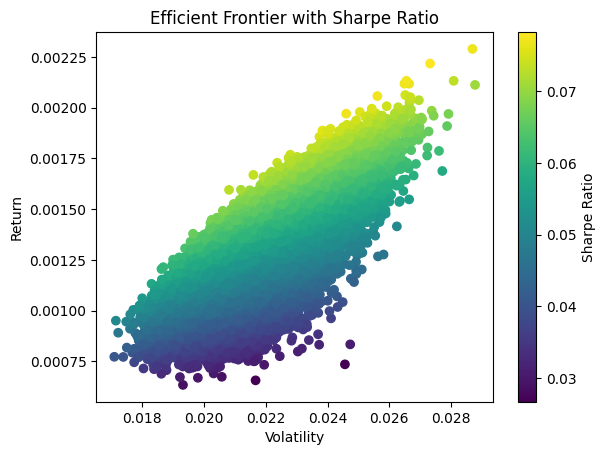

In [7]:
plt.scatter(results_df['volatility'], results_df['return'], c=results_df['sharpe'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier with Sharpe Ratio')
plt.show()